In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [3]:
train = pd.read_csv("train.csv")
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,cam_image1.jpg,480,270,queen,173,24,260,137
1,cam_image1.jpg,480,270,queen,165,135,253,251
2,cam_image1.jpg,480,270,ten,255,96,337,208
3,cam_image10.jpg,960,540,ten,501,116,700,353
4,cam_image10.jpg,960,540,queen,261,124,453,370


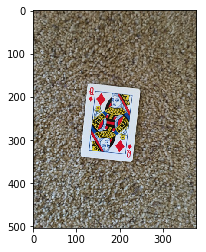

In [5]:
image = plt.imread('images/IMG_2387.JPG')
plt.imshow(image)

In [6]:
train["width"].nunique()

3

In [7]:
train["class"].value_counts()

king     95
ace      92
jack     89
nine     89
ten      82
queen    80
Name: class, dtype: int64

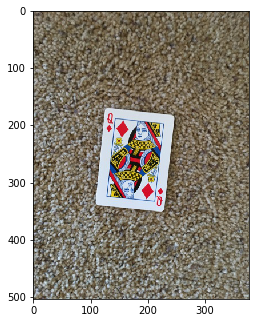

In [8]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('images/IMG_2387.JPG')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.filename == "IMG_2387.JPG"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'king':
        edgecolor = 'r'
        ax.annotate('K', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'queen':
        edgecolor = 'b'
        ax.annotate('Q', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'jack':
        edgecolor = 'g'
        ax.annotate('J', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'ace':
        edgecolor = 'b'
        ax.annotate('A', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'ten':
        edgecolor = 'c'
        ax.annotate('10', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'nine':
        edgecolor = 'r'
        ax.annotate('9', xy=(xmax-40,ymin+20))
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [9]:
data = pd.DataFrame()
data['format'] = train['filename']
data.shape[0]
data['format'][1]

'cam_image1.jpg'

In [10]:
data = pd.DataFrame()
data['format'] = train['filename']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'train_images/' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['class'][i]

data.to_csv('annotate.txt', header=None, index=None, sep=' ')

In [11]:
%cd keras-frcnn-master
!python train_frcnn.py -o simple -p annotate.txt

C:\Users\Divyakant Pandey\Desktop\major\frcnn\keras-frcnn-master


2019-05-20 13:32:01.111732: F tensorflow/python/lib/core/bfloat16.cc:675] Check failed: PyBfloat16_Type.tp_base != nullptr 
